In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

import gdown

In [2]:
url = "https://drive.google.com/uc?id=1262sRhBNg42mBBf-NxA1wdVKy1A1gpp-"
output = "goemotions.tgz"
if not Path(output).exists():
    gdown.download(url, output, quiet=False)
    !tar -xzf goemotions.tgz

In [3]:
file_paths = list(Path(".").glob("*.csv"))
file_paths

[WindowsPath('goemotions_1.csv'),
 WindowsPath('goemotions_2.csv'),
 WindowsPath('goemotions_3.csv')]

In [4]:
dfs = []
for file_path in file_paths:
    t = pd.read_csv(file_path)
    dfs.append(t)

df = pd.concat(dfs)
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.shape

(211225, 37)

In [6]:
df.groupby("id").head(1).shape

(58011, 37)

In [7]:
emotion_categories = df.columns[9:]
emotion_categories

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [8]:
row = df.iloc[10]
sample_ratings = df[df.id == row.id]
sample_ratings

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
10,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,36,False,0,...,0,0,0,0,0,0,0,0,0,1
17528,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,46,False,0,...,0,0,0,0,0,0,0,0,0,1
48961,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,3,False,0,...,0,0,0,0,1,0,0,0,0,0
3547,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,56,False,0,...,0,1,0,0,0,0,0,0,0,0
1080,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,70,False,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings = sample_ratings[emotion_categories]
ratings = ratings.columns[ratings.sum(axis=0) > 0]
ratings = ", ".join(ratings)
ratings

'joy, nervousness, realization, neutral'

In [10]:
print(f"text: {row.text}")
print(f"ratings: {ratings}")

text: I have, and now that you mention it, I think that's what triggered my nostalgia. 
ratings: joy, nervousness, realization, neutral


In [11]:
import tiktoken 
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")

def encode(text):
    return tokenizer.encode(text)

def decode(encoded):
    return tokenizer.decode(encoded)



encode(row.text)

[40,
 617,
 11,
 323,
 1457,
 430,
 499,
 6420,
 433,
 11,
 358,
 1781,
 430,
 596,
 1148,
 22900,
 856,
 65875,
 13,
 220]

In [12]:
df["text_encoded"] = df.text.apply(encode)

In [13]:
df["encoding_length"] = df.text_encoded.apply(len)

In [14]:
df.encoding_length.value_counts().sort_index(ascending=False).head(10)

encoding_length
986    3
315    3
227    3
207    2
174    3
165    3
104    3
93     3
89     3
82     3
Name: count, dtype: int64

<Axes: xlabel='encoding_length', ylabel='Count'>

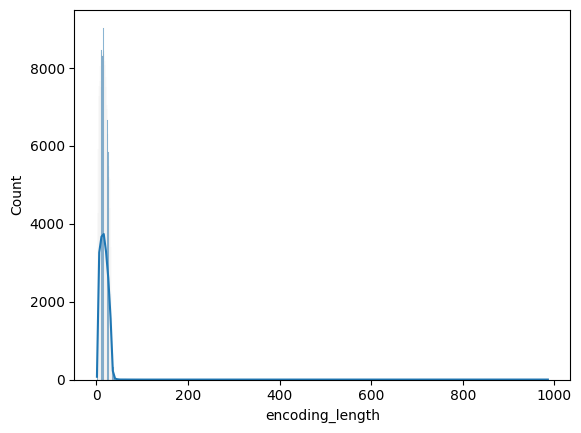

In [15]:
sns.histplot(df.encoding_length, kde=True)

In [16]:
# use 42 as max length
df = df[df.encoding_length < 42]
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,text_encoded,encoding_length
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,1,0,0,"[4897, 1847, 13194, 13]",4
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,"[871, 11814, 10965, 13434, 1431, 387, 264, 502...",31
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,1,"[2675, 656, 1314, 11, 422, 499, 1541, 956, 251...",14
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,0,0,0,0,0,0,0,0,"[1692, 358, 3021, 43274, 13]",5
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,1,"[58, 7687, 60, 574, 28211, 3221, 1124, 11, 568...",15


<Axes: xlabel='encoding_length', ylabel='Count'>

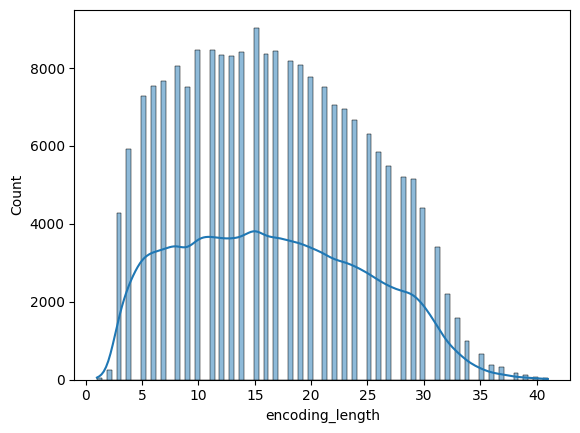

In [17]:
sns.histplot(df.encoding_length, kde=True)

In [18]:
df["example_very_unclear"].value_counts()

example_very_unclear
False    207585
True       3389
Name: count, dtype: int64

In [19]:
# drop examples that are very unclear
df = df[df.example_very_unclear == False]
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,text_encoded,encoding_length
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,1,0,0,"[4897, 1847, 13194, 13]",4
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,1,"[2675, 656, 1314, 11, 422, 499, 1541, 956, 251...",14
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,0,0,0,0,0,0,0,0,"[1692, 358, 3021, 43274, 13]",5
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,1,"[58, 7687, 60, 574, 28211, 3221, 1124, 11, 568...",15
5,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,2019-01-23 21:50:08,61,False,0,...,0,0,0,0,0,0,0,0,"[6107, 30, 56877, 433, 753, 1778, 459, 3062, 2...",26


In [20]:
emotion_to_index = {emotion: i for i, emotion in enumerate(emotion_categories)}
index_to_emotion = {i: emotion for i, emotion in enumerate(emotion_categories)}

In [21]:
texts = []
encodings = []
emotions = []
emotion_ids = []
for comment_id, group in df.groupby("id"):
    texts.append(group.iloc[0]["text"])
    encoding = group.iloc[0]["text_encoded"]
    padded_encoding = [0] * (42 - len(encoding)) + encoding
    encodings.append(padded_encoding)
    emotion_id = group[emotion_categories].sum(axis=0).argmax()
    emotions.append(index_to_emotion[emotion_id])
    emotion_ids.append(emotion_id)

df_clean = pd.DataFrame({
    "text": texts,
    "encoding": encodings,
    "emotion": emotions,
    "emotion_id": emotion_ids
})

<Axes: >

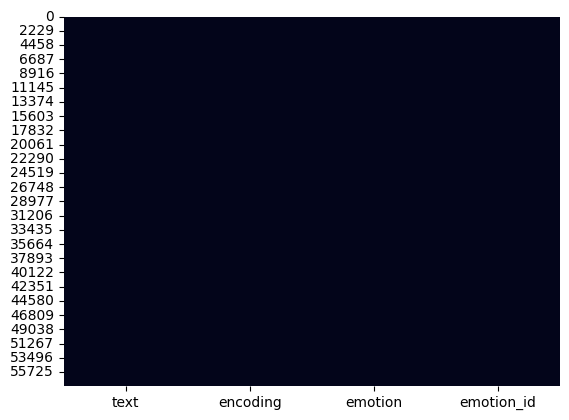

In [22]:
sns.heatmap(df_clean.isnull(), cbar=False)

In [23]:
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [24]:
from transformers import ElectraTokenizerFast as ElectraTokenizer

tokenizer = ElectraTokenizer.from_pretrained("google/electra-small-discriminator")
tokenizer("testing something", max_length=42, padding="max_length")

{'input_ids': [101, 5604, 2242, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [25]:
class EmotionDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        super().__init__()
        self.data = data

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        row = self.data.iloc[index]
        encoding = tokenizer(
            row.text,
            max_length=42,
            truncation=True,
            padding="max_length",
            add_special_tokens=True,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "target": torch.tensor(row.emotion_id),
        }

In [26]:
ds = EmotionDataset(df_clean)
print(len(ds) == len(df_clean))

True


In [27]:
for item in ds:
    print(item.keys())
    break

dict_keys(['input_ids', 'attention_mask', 'target'])


In [28]:
from sklearn.model_selection import train_test_split
import lightning.pytorch as pl

In [29]:
class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, data: pd.DataFrame, batch_size: int=16):
        super().__init__()
        self.data = data
        self.batch_size = batch_size
        self.setup()

    def setup(self, stage=None):
        self.train_df, test = train_test_split(self.data, test_size=0.1)
        self.test_df, self.val_df = train_test_split(test, test_size=0.5)

    def train_dataloader(self):
        return DataLoader(EmotionDataset(self.train_df), batch_size=self.batch_size, shuffle=True)
    
    def val_dataloader(self):
        return DataLoader(EmotionDataset(self.val_df), batch_size=self.batch_size)
    
    def test_dataloader(self):
        return DataLoader(EmotionDataset(self.test_df), batch_size=self.batch_size)

In [30]:
data_module = EmotionDataModule(df_clean)

In [31]:
for batch in data_module.train_dataloader():
    print(batch.keys())
    print(batch["input_ids"].shape)
    print(batch["attention_mask"].shape)
    print(batch["target"].shape)
    break

dict_keys(['input_ids', 'attention_mask', 'target'])
torch.Size([16, 42])
torch.Size([16, 42])
torch.Size([16])


In [32]:
from transformers import ElectraPreTrainedModel, ElectraModel
from transformers.models.electra.modeling_electra import ElectraClassificationHead 

class ElectraForEmotionClassification(ElectraPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.n_classes = config.num_labels
        self.electra = ElectraModel(config)
        self.classifier = ElectraClassificationHead(config)
        self.post_init()

    def forward(self, input_ids=None, attention_mask=None):
        discriminator_hidden_states = self.electra(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        sequence_output = discriminator_hidden_states[0]
        logits = self.classifier(sequence_output)
        return logits

In [33]:
sorted(df_clean["emotion_id"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [34]:
from torch import nn
from torch import optim

In [35]:
from typing import Optional

class EmotionClassifier(pl.LightningModule):
    def __init__(self, n_classes, learning_rate: Optional[float]=None):
        super().__init__()
        self.n_classes = n_classes
        self.classifier = ElectraForEmotionClassification.from_pretrained("google/electra-small-discriminator", num_labels=n_classes)
        self.criterion = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate

    def forward(self, input_ids=None, attention_mask=None):
        return self.classifier(input_ids=input_ids, attention_mask=attention_mask) # type: ignore
    
    def training_step(self, batch, batch_idx):
        return self.run_step(batch, "train")

    def run_step(self, batch, stage):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        target = batch["target"]
        logits = self(input_ids=input_ids, attention_mask=attention_mask)
        loss = self.criterion(logits, target)
        self.log(f"{stage}_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        return self.run_step(batch, "val")

    def test_step(self, batch, batch_idx):
        return self.run_step(batch, "test")

    def configure_optimizers(self):
        return optim.AdamW(self.parameters(), lr=self.learning_rate) # type: ignore

In [36]:
len(emotion_categories)

28

In [37]:
MAX_LEARNING_RATE = 1e-2
BATCH_SIZE = 64
data_module = EmotionDataModule(df_clean, batch_size=BATCH_SIZE)
data_module.setup()
model = EmotionClassifier(n_classes=len(emotion_categories), learning_rate=MAX_LEARNING_RATE)
model.to(device)

print(model(torch.zeros((BATCH_SIZE, 42), dtype=torch.long, device=device), torch.ones((BATCH_SIZE, 42), dtype=torch.long, device=device)).shape)



Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForEmotionClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForEmotionClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForEmotionClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForEmotionClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.out

torch.Size([64, 28])


In [38]:
from lightning.pytorch.tuner.tuning import Tuner

In [39]:
trainer = pl.Trainer(max_epochs=4)
tuner = Tuner(trainer)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [40]:
lr_finder = tuner.lr_find(model, data_module, max_lr=MAX_LEARNING_RATE)

You are using a CUDA device ('NVIDIA GeForce RTX 3050') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\benja\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\benja\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader,

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0006309573444801936
Restoring states from the checkpoint path at c:\Users\benja\Documents\Code\learning\pytorch-lightning\venelin-yt\.lr_find_e5ded85d-7f3b-4872-8090-41d542d022a9.ckpt
Restored all states from the checkpoint at c:\Users\benja\Documents\Code\learning\pytorch-lightning\venelin-yt\.lr_find_e5ded85d-7f3b-4872-8090-41d542d022a9.ckpt


C:\Users\benja\AppData\Local\Temp\ipykernel_25032\63603200.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


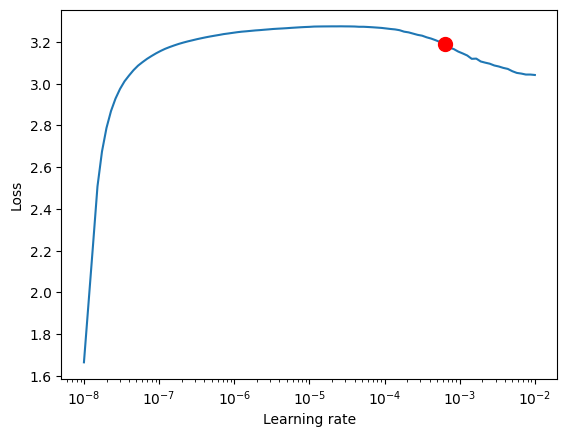

In [50]:
fig = lr_finder.plot(suggest=True)
fig.show();

In [51]:
new_lr = lr_finder.suggestion()
new_lr

0.0006309573444801936

In [52]:
model.learning_rate = new_lr

In [55]:
import os 
os.environ['TENSORBOARD_BINARY'] = r"C:\Users\benja\.pyenv\pyenv-win\versions\3.10.9\Scripts\tensorboard.exe"

In [56]:
%load_ext tensorboard
%tensorboard --logdir experiments

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [57]:
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import ModelCheckpoint

experiments_dir = "experiments"

model_checkpoint = ModelCheckpoint(
    dirpath=experiments_dir,
    filename="{epoch}--{step}--{val_loss:.2f}",
    save_last=True,
    save_top_k=1,
    monitor="val_loss_epoch",
    mode="min",
)

logger = TensorBoardLogger(experiments_dir, name="emotion-classification")

In [60]:
trainer = pl.Trainer(
    default_root_dir=experiments_dir,
    max_epochs=5,
    callbacks=[model_checkpoint],
    val_check_interval=100,
    logger=logger,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


In [61]:
trainer.fit(model, data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                            | Params
---------------------------------------------------------------
0 | classifier | ElectraForEmotionClassification | 13.6 M
1 | criterion  | CrossEntropyLoss                | 0     
---------------------------------------------------------------
13.6 M    Trainable params
0         Non-trainable params
13.6 M    Total params
54.224    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1500` reached.
